In [ ]:
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob
import plotly.express as px
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import statistics
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org dython

## TASK

Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task.

Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

In [ ]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import chardet

In [ ]:
#read in the csv file
from google.colab import files

uploaded = files.upload()


Saving customer_booking.csv to customer_booking (2).csv


In [ ]:
filename = list(uploaded.keys())[0]

# Detect the file encoding
with open(filename, 'rb') as f:
    raw_data = f.read(10000)  # Read the first 10KB for encoding detection
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"Detected encoding: {detected_encoding}")

Detected encoding: ascii


In [ ]:
import pandas as pd

# Read the file using the detected encoding
try:
    df = pd.read_csv(filename, encoding=detected_encoding)
    print("File read successfully with detected encoding.")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Attempting to read with fallback encodings.")


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe9 in position 14695: ordinal not in range(128)
Attempting to read with fallback encodings.


In [ ]:
# Fallback to 'latin1' or other common encodings
try:
    df = pd.read_csv(filename, encoding='latin1')  # 'latin1' is ISO-8859-1
    print("File read successfully with 'latin1' encoding.")
except Exception as e:
    print(f"Failed with 'latin1' encoding: {e}")

# Read the file while ignoring or replacing errors
try:
    df = pd.read_csv(filename, encoding='utf-8', errors='ignore')  # Ignores errors
    print("File read successfully with 'utf-8' encoding, ignoring errors.")
except Exception as e:
    print(f"Failed with 'utf-8' encoding: {e}")

try:
    df = pd.read_csv(filename, encoding='utf-8', errors='replace')  # Replaces problematic characters
    print("File read successfully with 'utf-8' encoding, replacing errors.")
except Exception as e:
    print(f"Failed with 'utf-8' encoding: {e}")


File read successfully with 'latin1' encoding.
Failed with 'utf-8' encoding: read_csv() got an unexpected keyword argument 'errors'
Failed with 'utf-8' encoding: read_csv() got an unexpected keyword argument 'errors'


In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
# prompt: Using dataframe df: Explore and prepare the dataset
# First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model

# Explore the dataset
df.head()
df.describe()
df.info()

# Check for missing values
df.isnull().sum()

# Create new features

df['is_weekend'] = df['flight_day'].isin(['Sat', 'Sun'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [320]:
unique_value_counts = df['booking_complete'].value_counts()

print("Counts of each unique value in 'booking_complete' column:")
print(unique_value_counts)

Counts of each unique value in 'booking_complete' column:
booking_complete
0    42522
1     7478
Name: count, dtype: int64


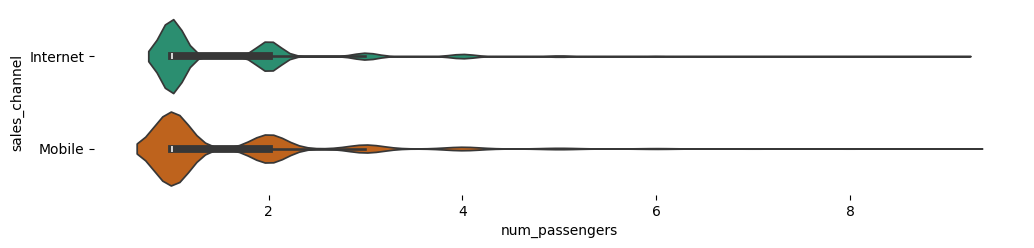

In [ ]:
# @title sales_channel vs num_passengers

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sales_channel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='num_passengers', y='sales_channel', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

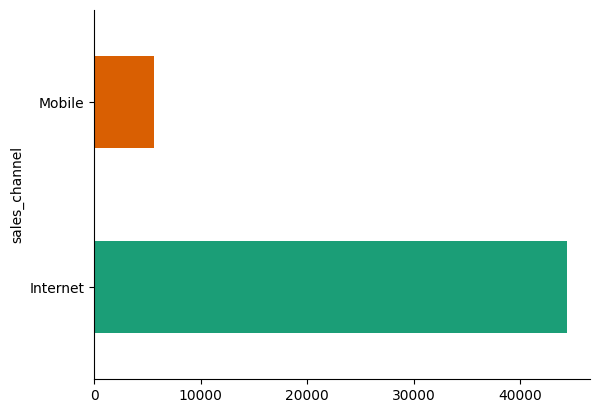

In [ ]:
# @title sales_channel

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sales_channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

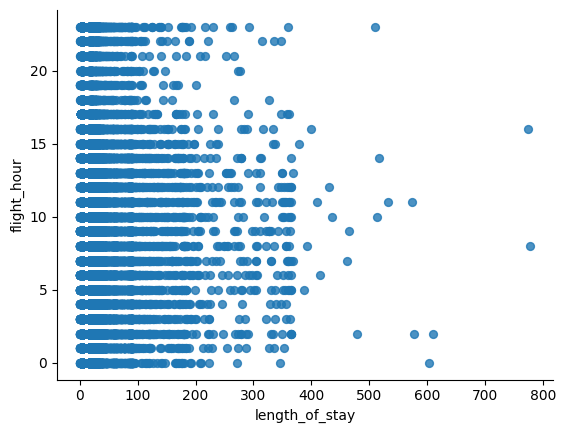

In [ ]:
# @title length_of_stay vs flight_hour

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='length_of_stay', y='flight_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

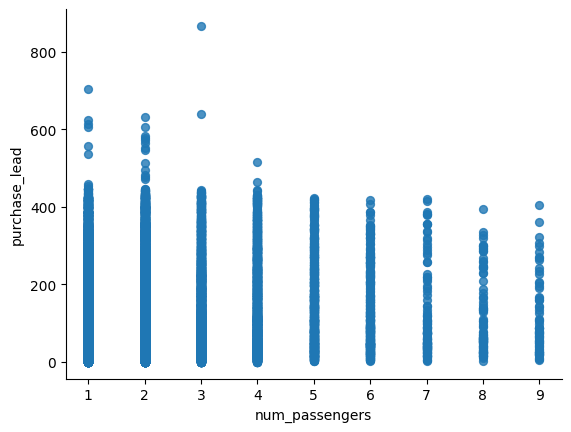

In [ ]:
# @title num_passengers vs purchase_lead

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='num_passengers', y='purchase_lead', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

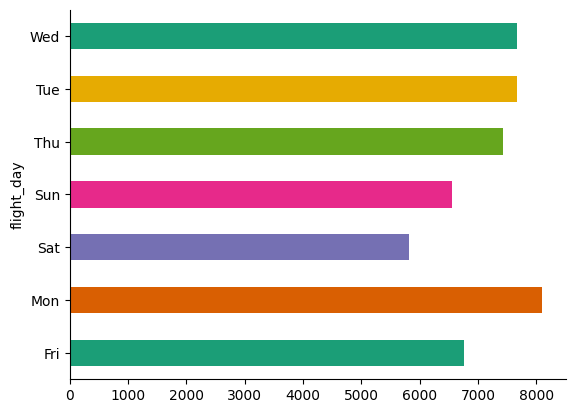

In [ ]:
# @title flight_day

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('flight_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

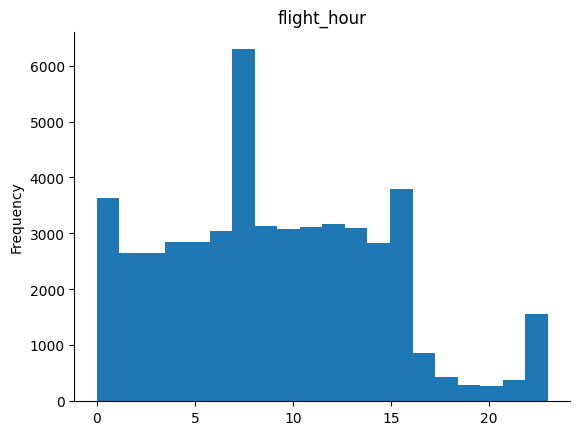

In [ ]:
# @title flight_hour

from matplotlib import pyplot as plt
df['flight_hour'].plot(kind='hist', bins=20, title='flight_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  is_weekend             50000 non-null  bool   
dtypes:

<Axes: title={'center': 'booking'}, ylabel='Frequency'>

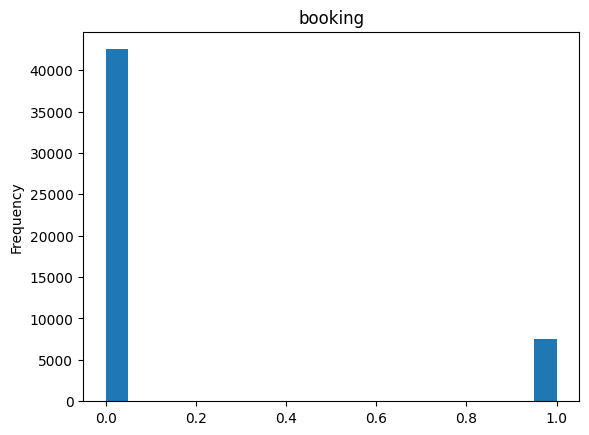

In [ ]:
df['booking_complete'].plot(kind='hist', bins=20, title='booking')


To determine if customers will complete their bookings not and to check variables that contribute to customers completing booking

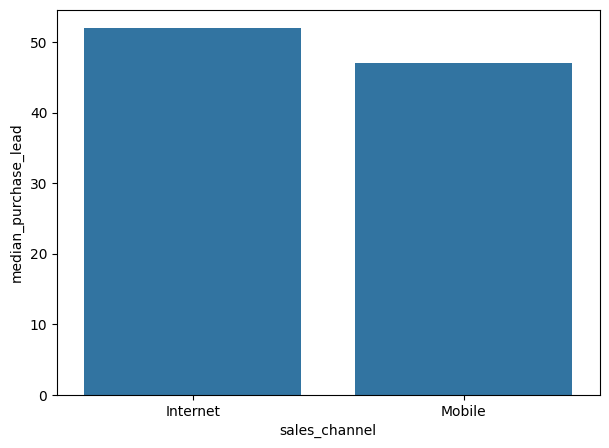

In [ ]:
group_by_dc = df.groupby('sales_channel')
d2 = pd.DataFrame(round(group_by_dc['purchase_lead'].median(),2)).reset_index().rename(columns = {'purchase_lead': 'median_purchase_lead'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['sales_channel'], y = d2['median_purchase_lead'])
plt.show()

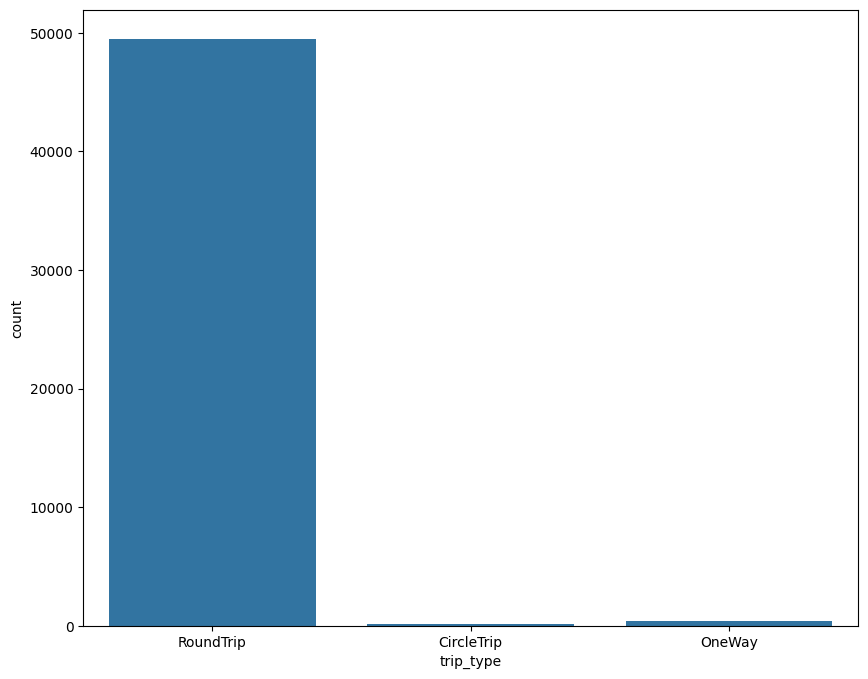

In [ ]:
plt.figure( figsize=(10, 8))

# visualising the meal types
sns.countplot(x = df['trip_type'])
plt.show()

In [ ]:
Uncompleted_Booking= df[df['booking_complete'] == 0]


In [ ]:
completed_Booking= df[df['booking_complete'] == 1]

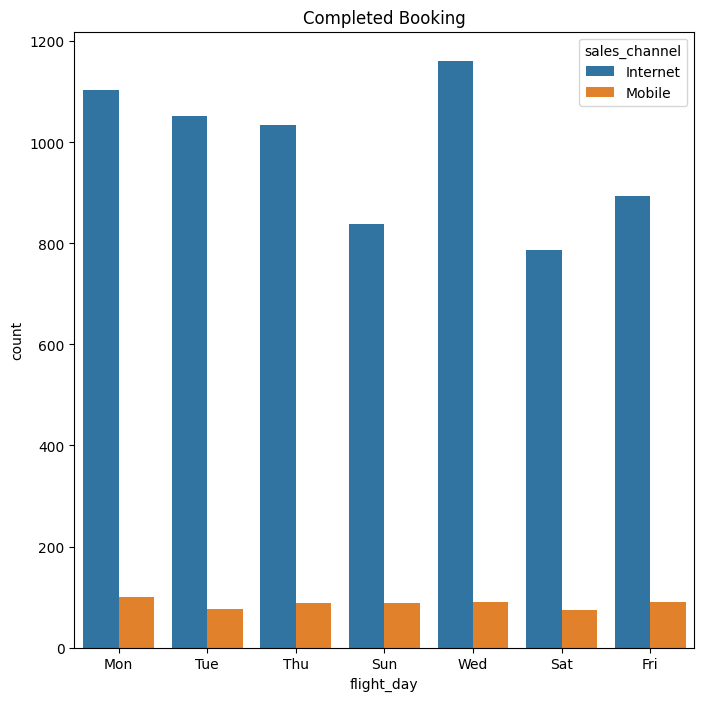

In [314]:
plt.subplots(figsize=(8,8))
plt.title('Completed Booking')
sns.countplot(x='flight_day', hue='sales_channel',  data=completed_Booking);

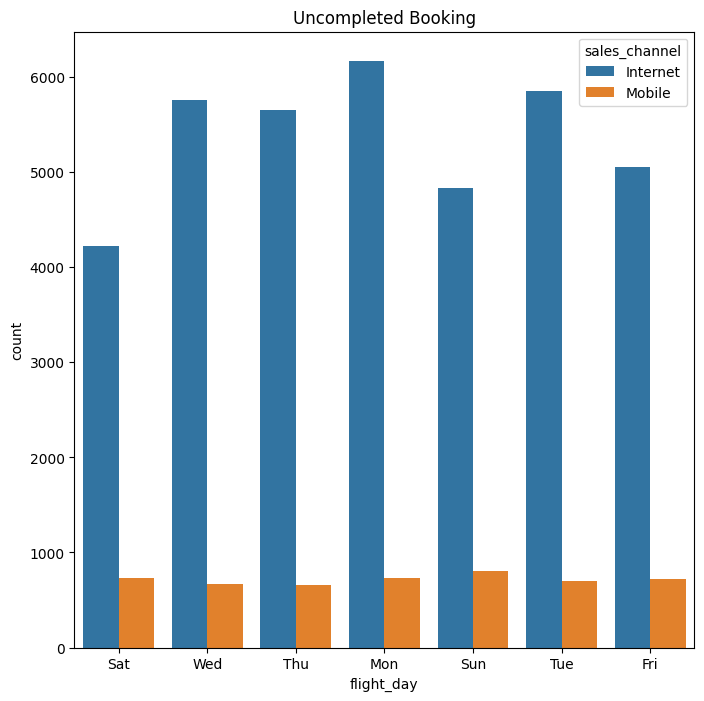

In [315]:
plt.subplots(figsize=(8,8))
plt.title('Uncompleted Booking')
sns.countplot(x='flight_day', hue='sales_channel',  data=Uncompleted_Booking);

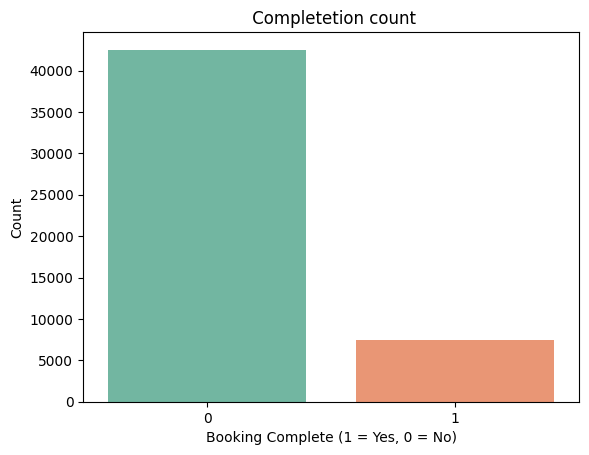

In [316]:
# Create a count plot for the 'survived' column (0 = Yes, 1 = No)
sns.countplot(x="booking_complete", data=df, palette="Set2")

# Customize the plot
plt.xlabel("Booking Complete (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title(" Completetion count")

# Show the plot
plt.show()

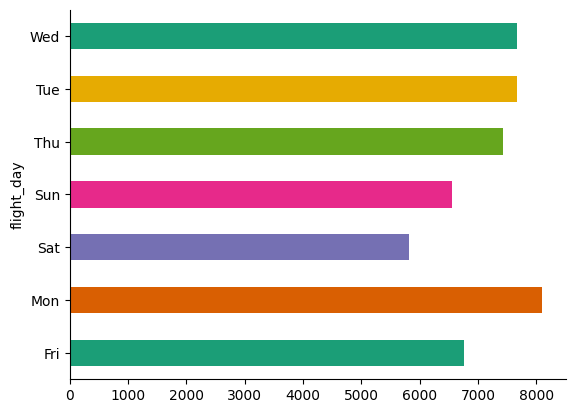

In [ ]:
df.groupby('flight_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

## Correlation Check

In [ ]:
!pip install dython
import dython
from dython.nominal import associations

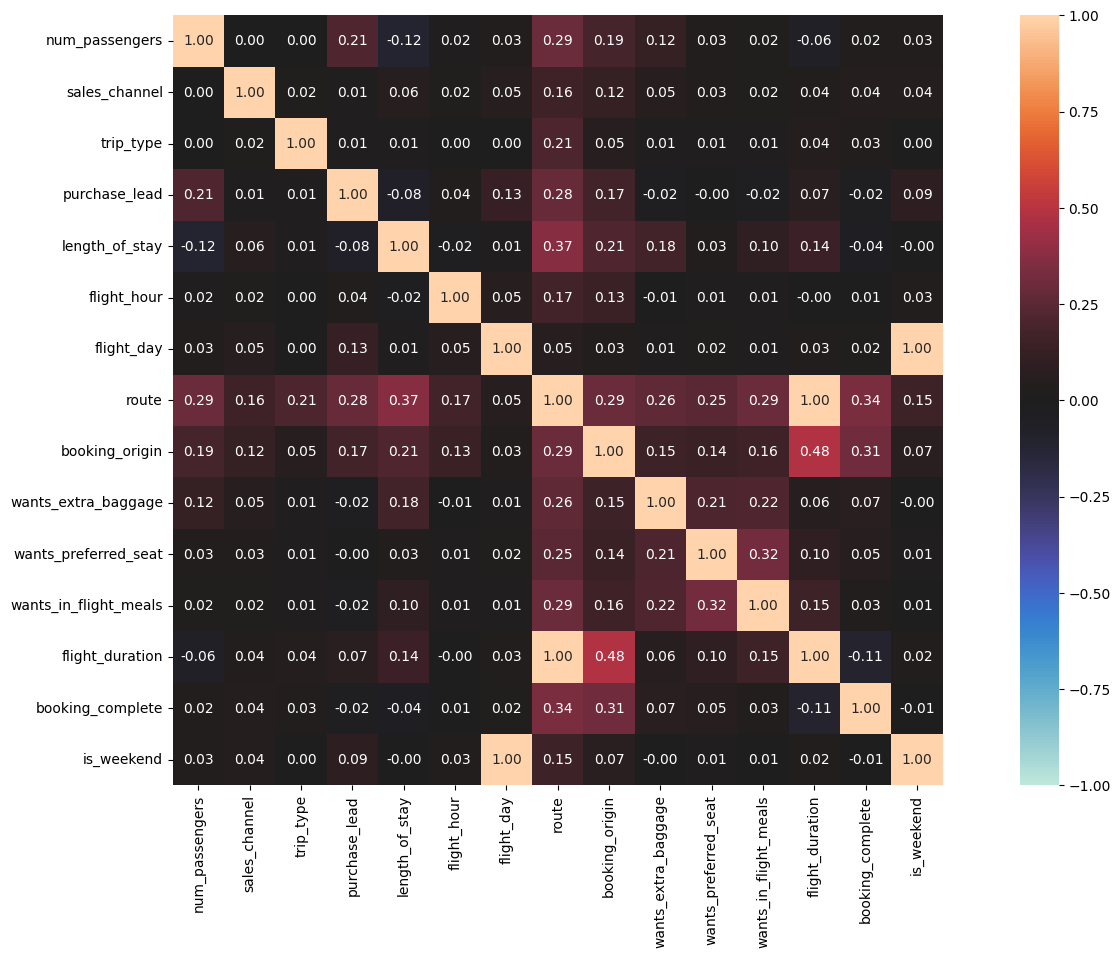

In [ ]:
associations(df, figsize = (20, 10))
plt.show()

## Modelling

In [ ]:
#print column headers
column_headers_list_comp = [col for col in df]
print("Column headers from list comprehension:", column_headers_list_comp)


Column headers from list comprehension: ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'is_weekend']


In [ ]:
X = df[['num_passengers','sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay','flight_hour', 'flight_day', 'route', 'booking_origin','wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals', 'flight_duration']]
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 30)

In [ ]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
9432,1,Internet,RoundTrip,26,22,7,Tue,DMKOOL,Australia,0,1,0,8.83
25595,1,Internet,RoundTrip,28,26,9,Wed,TWUXIY,Malaysia,1,0,1,5.00
42290,7,Internet,RoundTrip,119,6,1,Tue,AKLKUL,Malaysia,1,0,1,8.83
25474,1,Internet,RoundTrip,69,22,22,Sun,SYDTRZ,Australia,1,1,0,8.58
40477,3,Mobile,RoundTrip,88,5,5,Wed,LGKPEK,China,1,0,0,6.42


In [ ]:
#print column headers
column_headers_list_comp = [col for col in df]
print("Column headers from list comprehension:", column_headers_list_comp)

Column headers from list comprehension: ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'is_weekend']


In [ ]:
cat_columns = ['sales_channel','trip_type','route', 'booking_origin', 'flight_day']
num_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [ ]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])


## Logistic Regression

In [ ]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [ ]:
# Predict on test and train set
y_pred_logreg_base = pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

# Evaluate model performance
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

# Print the results
print(f"Training Accuracy: {acc_logreg_base_train:.2f}")
print(f"Testing Accuracy: {acc_logreg_base:.2f}")
print(f"Recall: {recall_logreg_base:.2f}")
print(f"Precision: {precision_logreg_base:.2f}")
print(f"F1 Score: {f1_logreg_base:.2f}")


Training Accuracy: 0.85
Testing Accuracy: 0.85
Recall: 0.06
Precision: 0.46
F1 Score: 0.11


In [ ]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.46      0.06      0.11      1496

    accuracy                           0.85     10000
   macro avg       0.66      0.53      0.51     10000
weighted avg       0.80      0.85      0.80     10000



In [ ]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['Actual_Completed', 'Actual_Uncompleted'], columns = ['Predicted_Completed', 'Predicted_Uncompleted'])
df_logreg_base

,Predicted_Completed,Predicted_Uncompleted
Actual_Completed,96,1400
Actual_Uncompleted,113,8391


Text(0.5, 1.0, 'Confusion Matrix')

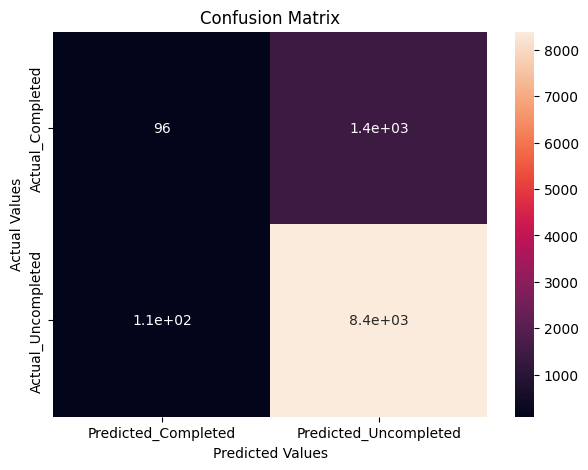

In [321]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [ ]:

#arcquiring the predictions
rf_model_pred = pipe_logreg.predict_proba(X_test)

booking_preds = pd.DataFrame(data=rf_model_pred, columns = ['Completed_Booking', 'Uncompleted_Booking'], index=X_test.index.copy())

# y_test['preds'] = rf_model_pred

book_pred = pd.merge(df, booking_preds, left_index=True, right_index=True)

In [ ]:
Booking_Pred = book_pred[['Uncompleted_Booking', 'Completed_Booking']]


In [ ]:
Booking_Pred

,Uncompleted_Booking,Completed_Booking
6,0.021735,0.978265
10,0.098697,0.901303
16,0.046925,0.953075
19,0.101216,0.898784
23,0.031044,0.968956
...,...,...
49968,0.251440,0.748560
49976,0.442677,0.557323
49985,0.078492,0.921508
49997,0.040508,0.959492


## Random Forest

In [ ]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [ ]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")

# we also have an overfitting condition for Random Forest model as well in this case
# we also will fix it later on the hyperparameter tuning

Training Accuracy : 0.999825
Testing Accuracy : 0.8481


In [ ]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.47      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.67      0.55      0.55     10000
weighted avg       0.80      0.85      0.81     10000



In [ ]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['actual_Completed', 'actual_Uncompleted'], columns = ['Predicted_Completed', 'Predicted_Uncompleted'])
df_RF_base

,Predicted_Completed,Predicted_Uncompleted
actual_Completed,174,1322
actual_Uncompleted,197,8307


In [ ]:
from sklearn.metrics import confusion_matrix

y_test_preds = pipe_RF.predict(X_test)

Pred = confusion_matrix(y_test, y_test_preds)
print(Pred)

[[8307  197]
 [1322  174]]


([<matplotlib.axis.YTick at 0x78e0ef80b8b0>,
 [Text(0, 0.5, 'Completed'), Text(0, 1.5, 'Uncompleted')])

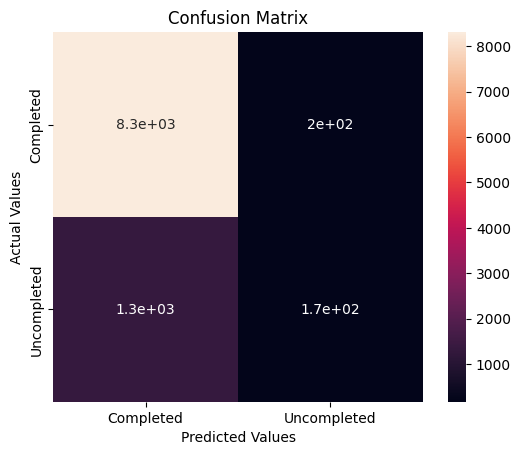

In [ ]:
sns.heatmap(Pred, square=True, annot=True,);
#labels, title and ticks
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Completed', 'Uncompleted'])
plt.yticks([0.5, 1.5], ['Completed', 'Uncompleted'])




## ***MODELLING COMBINING ALL THE MODELS***

In [ ]:
# Fit the pipeline on training data
pipe_logreg.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sales_channel', 'trip_type',
                                                   'route', 'booking_origin',
                                                   'flight_day']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals',
                                                   'flight_duration'])])),
                ('algo', LogisticRegression())])

To get the names of all the transformed features, we need to go through the ColumnTransformer and extract them.

In [ ]:
# Function to get feature names after transformation
def get_feature_names(column_transformer, input_features):
    # Function to retrieve transformed feature names
    output_features = []
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(pipe, 'get_feature_names_out'):
                names = pipe.get_feature_names_out(features)
            else:
                names = features
            output_features.extend(names)
        else:
            output_features.extend(features)
    return output_features

# Extract feature names after transformation
feature_names = get_feature_names(prepocessor, X.columns)


# Feature importances Logistic regression

In [ ]:
# Get the coefficients from logistic regression model
coefs = pipe_logreg.named_steps['algo'].coef_[0]


In [ ]:
# Create a DataFrame for feature importances
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


          Feature  Coefficient
362  route_HKTICN    -2.227723
275  route_DELSYD    -2.144050
432  route_ICNSYD    -2.054602
416  route_ICNLGK     2.032181
580  route_LGKPUS     1.950127
..            ...          ...
181  route_CRKMEL     0.003271
174  route_COKMEL    -0.003160
266  route_DELPEN    -0.002177
111  route_CGKPEK    -0.002156
526  route_KIXMEL    -0.001906

[895 rows x 2 columns]


In [ ]:
# Create a DataFrame for feature importances
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


          Feature  Coefficient
362  route_HKTICN    -2.227723
275  route_DELSYD    -2.144050
432  route_ICNSYD    -2.054602
416  route_ICNLGK     2.032181
580  route_LGKPUS     1.950127
..            ...          ...
181  route_CRKMEL     0.003271
174  route_COKMEL    -0.003160
266  route_DELPEN    -0.002177
111  route_CGKPEK    -0.002156
526  route_KIXMEL    -0.001906

[895 rows x 2 columns]


## Feature Importances Random Forest

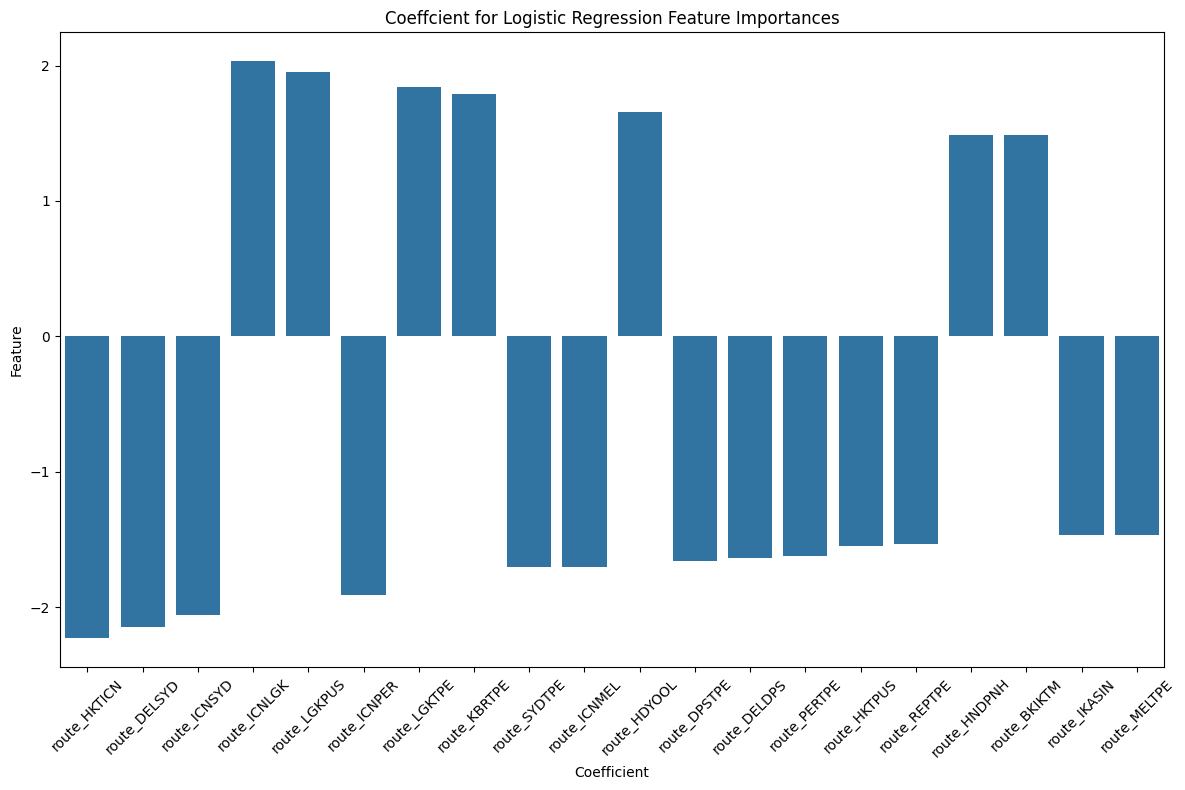

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Coefficient', data=coef_df.head(20))
plt.title('Coeffcient for Logistic Regression Feature Importances')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Multiple machine learning pipelines using scikit-learn's Pipeline and ColumnTransformer for preprocessing and model training. Below is a detailed breakdown of each part of the code, the steps involved, and how to use these pipelines for model training and evaluation.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
from sklearn.preprocessing import RobustScaler

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])


In [ ]:
from sklearn.compose import ColumnTransformer

prepocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, cat_columns),
    ('numerical', numerical_pipeline, num_columns)
])


In [ ]:
from sklearn.linear_model import LogisticRegression

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])


In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])


In [ ]:
from xgboost import XGBClassifier

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of pipelines to evaluate
pipelines = [pipe_logreg, pipe_KNN, pipe_RF, pipe_DT, pipe_XGB]
pipeline_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Decision Tree', 'XGBoost']

# Evaluate each pipeline
for name, pipeline in zip(pipeline_names, pipelines):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate on test set
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Evaluate on training set
    acc_train = accuracy_score(y_train, y_pred_train)

    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {acc_train:.2f}")
    print(f"Testing Accuracy: {acc:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("-" * 30)


Model: Logistic Regression
Training Accuracy: 0.85
Testing Accuracy: 0.85
Recall: 0.07
Precision: 0.51
F1 Score: 0.13
------------------------------
Model: K-Nearest Neighbors
Training Accuracy: 0.87
Testing Accuracy: 0.84
Recall: 0.18
Precision: 0.39
F1 Score: 0.25
------------------------------
Model: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.85
Recall: 0.13
Precision: 0.53
F1 Score: 0.21
------------------------------
Model: Decision Tree
Training Accuracy: 1.00
Testing Accuracy: 0.80
Recall: 0.30
Precision: 0.31
F1 Score: 0.31
------------------------------
Model: XGBoost
Training Accuracy: 0.86
Testing Accuracy: 0.85
Recall: 0.09
Precision: 0.54
F1 Score: 0.16
------------------------------


Extracting Feature Importances:
For tree-based models like RandomForest, DecisionTree, and XGBoost, you can directly access feature importances. For logistic regression, coefficients are used

Random Forest

Visualizing Feature Importances:
Had to reset the category and number columns to accomodate object datatypes to be able to properly visualise the feature importances.

In [ ]:
!pip install utils

In [ ]:
# Identify categorical and numerical columns
cat_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_columns = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessing pipelines
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, cat_columns),
    ('numerical', numerical_pipeline, num_columns)
])

# Define RandomForest pipeline
pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the RandomForest pipeline on the training data
pipe_RF.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals',
                                                   'flight_duration'])])),
                ('algo', RandomForestClassifier(random_state=42))])

In [ ]:
# Function to get transformed feature names
def get_transformed_feature_names(column_transformer, input_features):
    output_features = []
    for name, transformer, columns in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                transformed_names = transformer.get_feature_names_out(columns)
            else:
                transformed_names = columns
            output_features.extend(transformed_names)
        else:
            output_features.extend(columns)
    return output_features


                                 Feature    Importance
888                        purchase_lead  1.444374e-01
890                          flight_hour  1.201979e-01
889                       length_of_stay  1.109470e-01
887                       num_passengers  4.668616e-02
894                      flight_duration  3.714788e-02
..                                   ...           ...
564                         route_KOSMEL  1.046271e-07
871  booking_origin_Svalbard & Jan Mayen  1.010865e-07
565                         route_KOSOOL  8.451406e-08
630                         route_MELSZX  4.407998e-08
192                         route_CSXSYD  1.180546e-08

[895 rows x 2 columns]


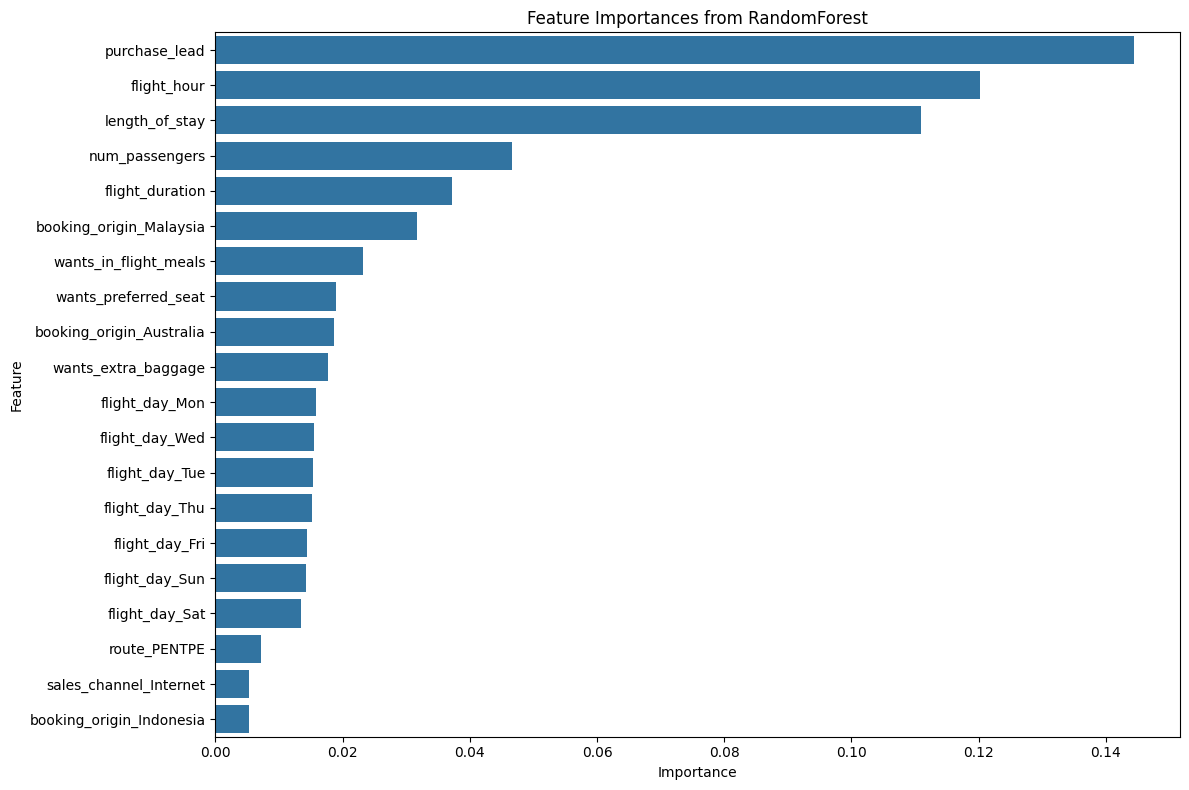

In [ ]:
# Get feature importances from RandomForest
importances = pipe_RF.named_steps['algo'].feature_importances_
feature_names = get_transformed_feature_names(preprocessor, X.columns)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Feature Importances from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()